# K-Means Clustering

Rock Boynton | CS 4850 

## Introduction

In this notebook, we will implement and apply the K-Means clustering algorithm to some data, specifically the `gaussguess.csv` dataset.

We will then run the following experiments:

1. Initialization

2. Local Optima

3. Selecting K

## Summary of Results

TODO

---

## Experiments

Before we begin our experiments, let's import some boilerplate libraries that we will need as well as define a function for plotting the datpoints with memberships colored.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_memberships(assignments, k):
    for group in range(k):
        cluster = data[assignments == group]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=group, alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()


def plot_intra_group_variation(trials, scores):
    plt.scatter(range(trials), scores)
    plt.xlabel('Iteration')
    plt.ylabel('Intra-group variation')
    plt.show()

### Experiment 1: Initialization

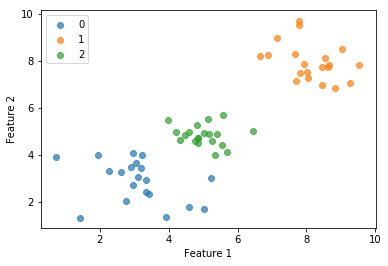

In [47]:
# Step 1: Import our KMeans class
from kmeans import KMeans

# Step 2: Load in the provided data file “gaussguess.csv” and create a 2D Numpy array from it.
datapath = 'gaussguess.csv'
data = np.loadtxt(datapath, delimiter=',')

# Step 3: Run model on the given dataset with parameters `k = 3` and `iterations = 10` and plot first two dimensions
k = 3
iterations = 10
model = KMeans(k, iterations)
assignments = model.fit_predict(data)

plot_data_with_memberships(assignments, model.k)

### Experiment 2: Local Optima

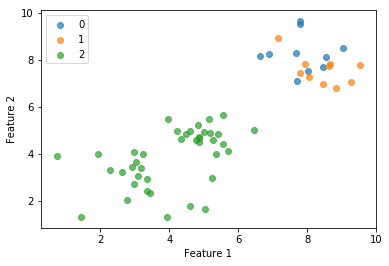

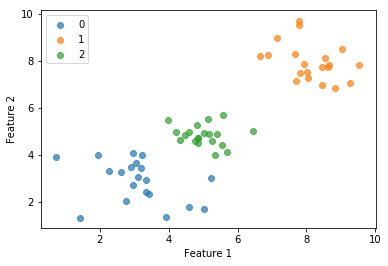

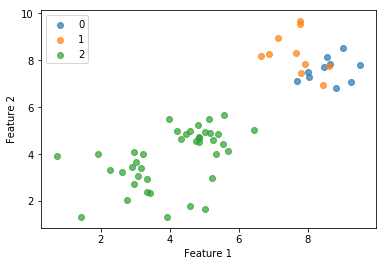

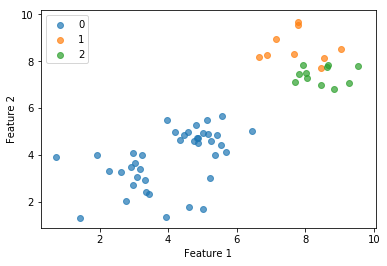

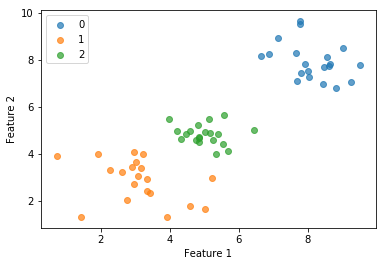

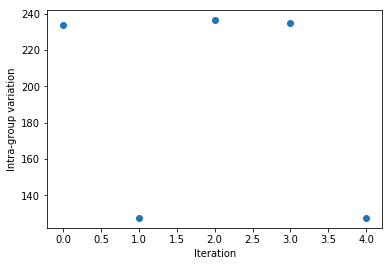

In [48]:
# Step 1: Run KMeans 5 times using `k = 3` and `iterations = 10`, storing the intra-group variation (score) in a NumPy vector. Then plot the datapoints with group membership colored. 
trials = 5
scores = np.zeros(5)
for trial in range(trials):
    model = KMeans(k, iterations)
    assignments = model.fit_predict(data)
    scores[trial] = model.score(data)
    plot_data_with_memberships(assignments, model.k)

# Step 2: Plot each intra-group variation from each evaluation. 
plot_intra_group_variation(trials, scores)

As we can see, intra-group variation is not the same between variations. I don't think we can expect it to be either because the first step of the K-Means algorithm is random selection of initial cluster centers.

### Experiment 3: Selecting K

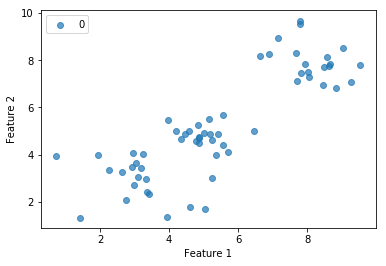

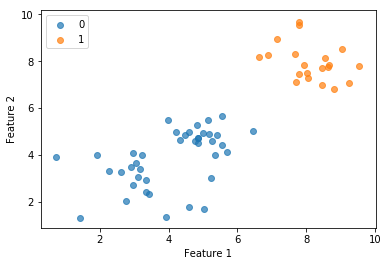

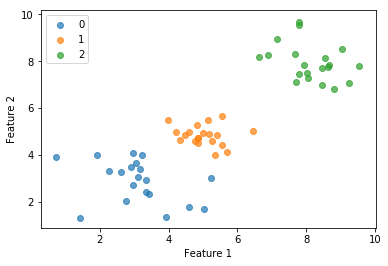

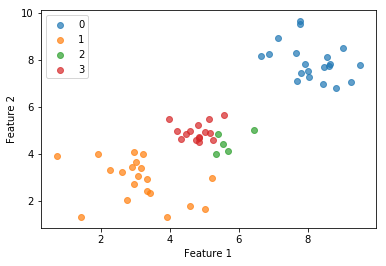

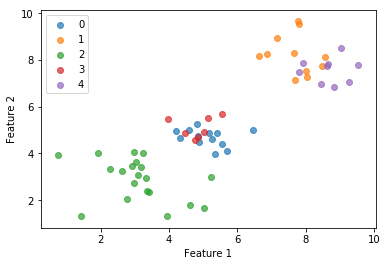

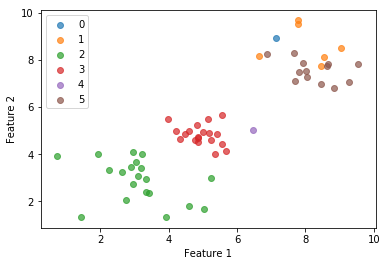

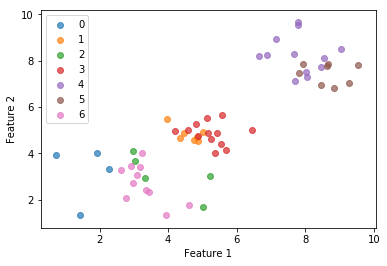

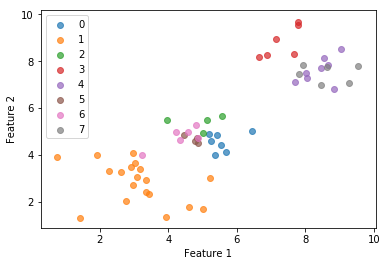

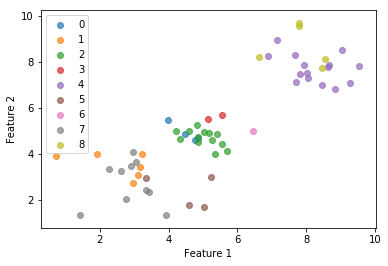

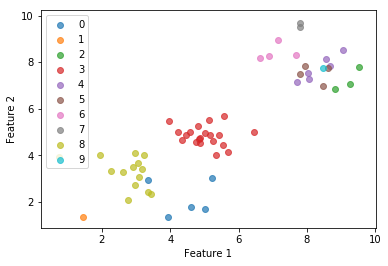

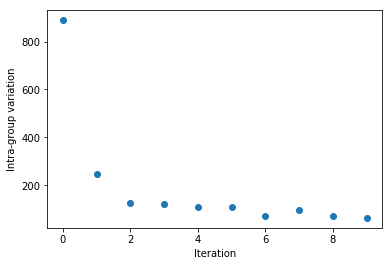

In [49]:
# Step 1: Run KMeans 10 times storing the intra-group variation in a NumPy vector each time and plot the datapoints with group membership colored. 
trials = 10
k = 10
scores = np.zeros(10)
for trial, trial_k in zip(range(trials), range(1, k+1)):
    model = KMeans(trial_k, iterations)
    assignments = model.fit_predict(data)
    scores[trial] = model.score(data)
    plot_data_with_memberships(assignments, model.k)

# Step 2: Plot k vs the within-cluster variance calculated by the score() method. 
plot_intra_group_variation(trials, scores)

As we can see, as we increase k, the intragroup variation generally decreases, however with diminishing returns. At `k=2`/`k=3`, the intragroup variation relatively levels out. This point is referred to as the "elbow", i.e. where adding more clusters doesn't give much better modeling of the data 